In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
mushroom_dataset = pd.read_csv("mushrooms.csv")

# Exploratory Data Analysis And Preprocessing

In [3]:
#check the number of rows and columns in the dataset
mushroom_dataset.shape

(8124, 23)

In [4]:
#lets look at the first few rows of the dataset
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The target feature 'class' is the first column in this dataset.

#### Using info() to print the concise summary of the mushroom dataset

In [5]:
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

From the above result we can interpret the following
* All the features in the dataset consists of categorical values
* There seems to be no null or missing values. Although we will confirm this in the next step.
* Since all the feature columns have categorical values in it, we will not run a describe method to know the five
  point summary of our dataset.

In [26]:
#Verify if there is any null values in dataset
mushroom_dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Check for cardinality 
For this we check how many unique values are present in our categorical columns and take necessary actions on columns with less cardinality

In [6]:
mushroom_dataset.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

From the above result, we can interpret the following
* Feature columns bruises, gill-attachment, gill-spacing, gill-size, stalk-shape, veil-type have less cardinality.
* Action to be taken : drop these columns and train the model using remaining features

In [7]:
#Drop the above mentioned feature columns and create a new dataset
mushroom_new = mushroom_dataset.drop(columns=['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type'],inplace = False)

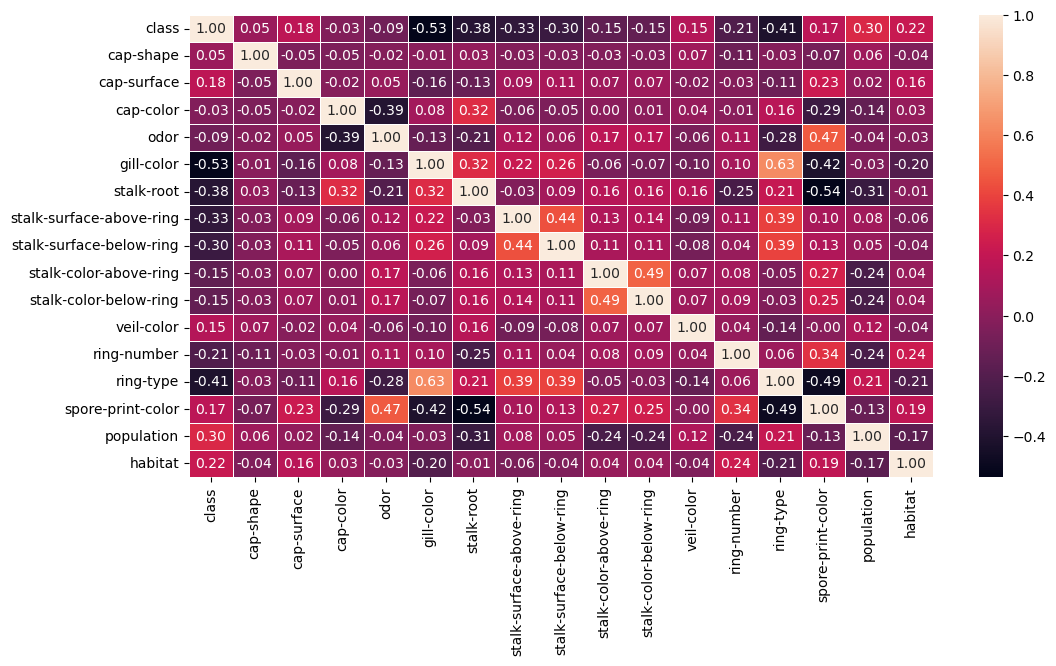

In [27]:
#Correlation of features in the dataset
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(mushroom_encoded.corr(), annot=True, fmt=".2f",linewidths=.5,ax=ax)
plt.show()

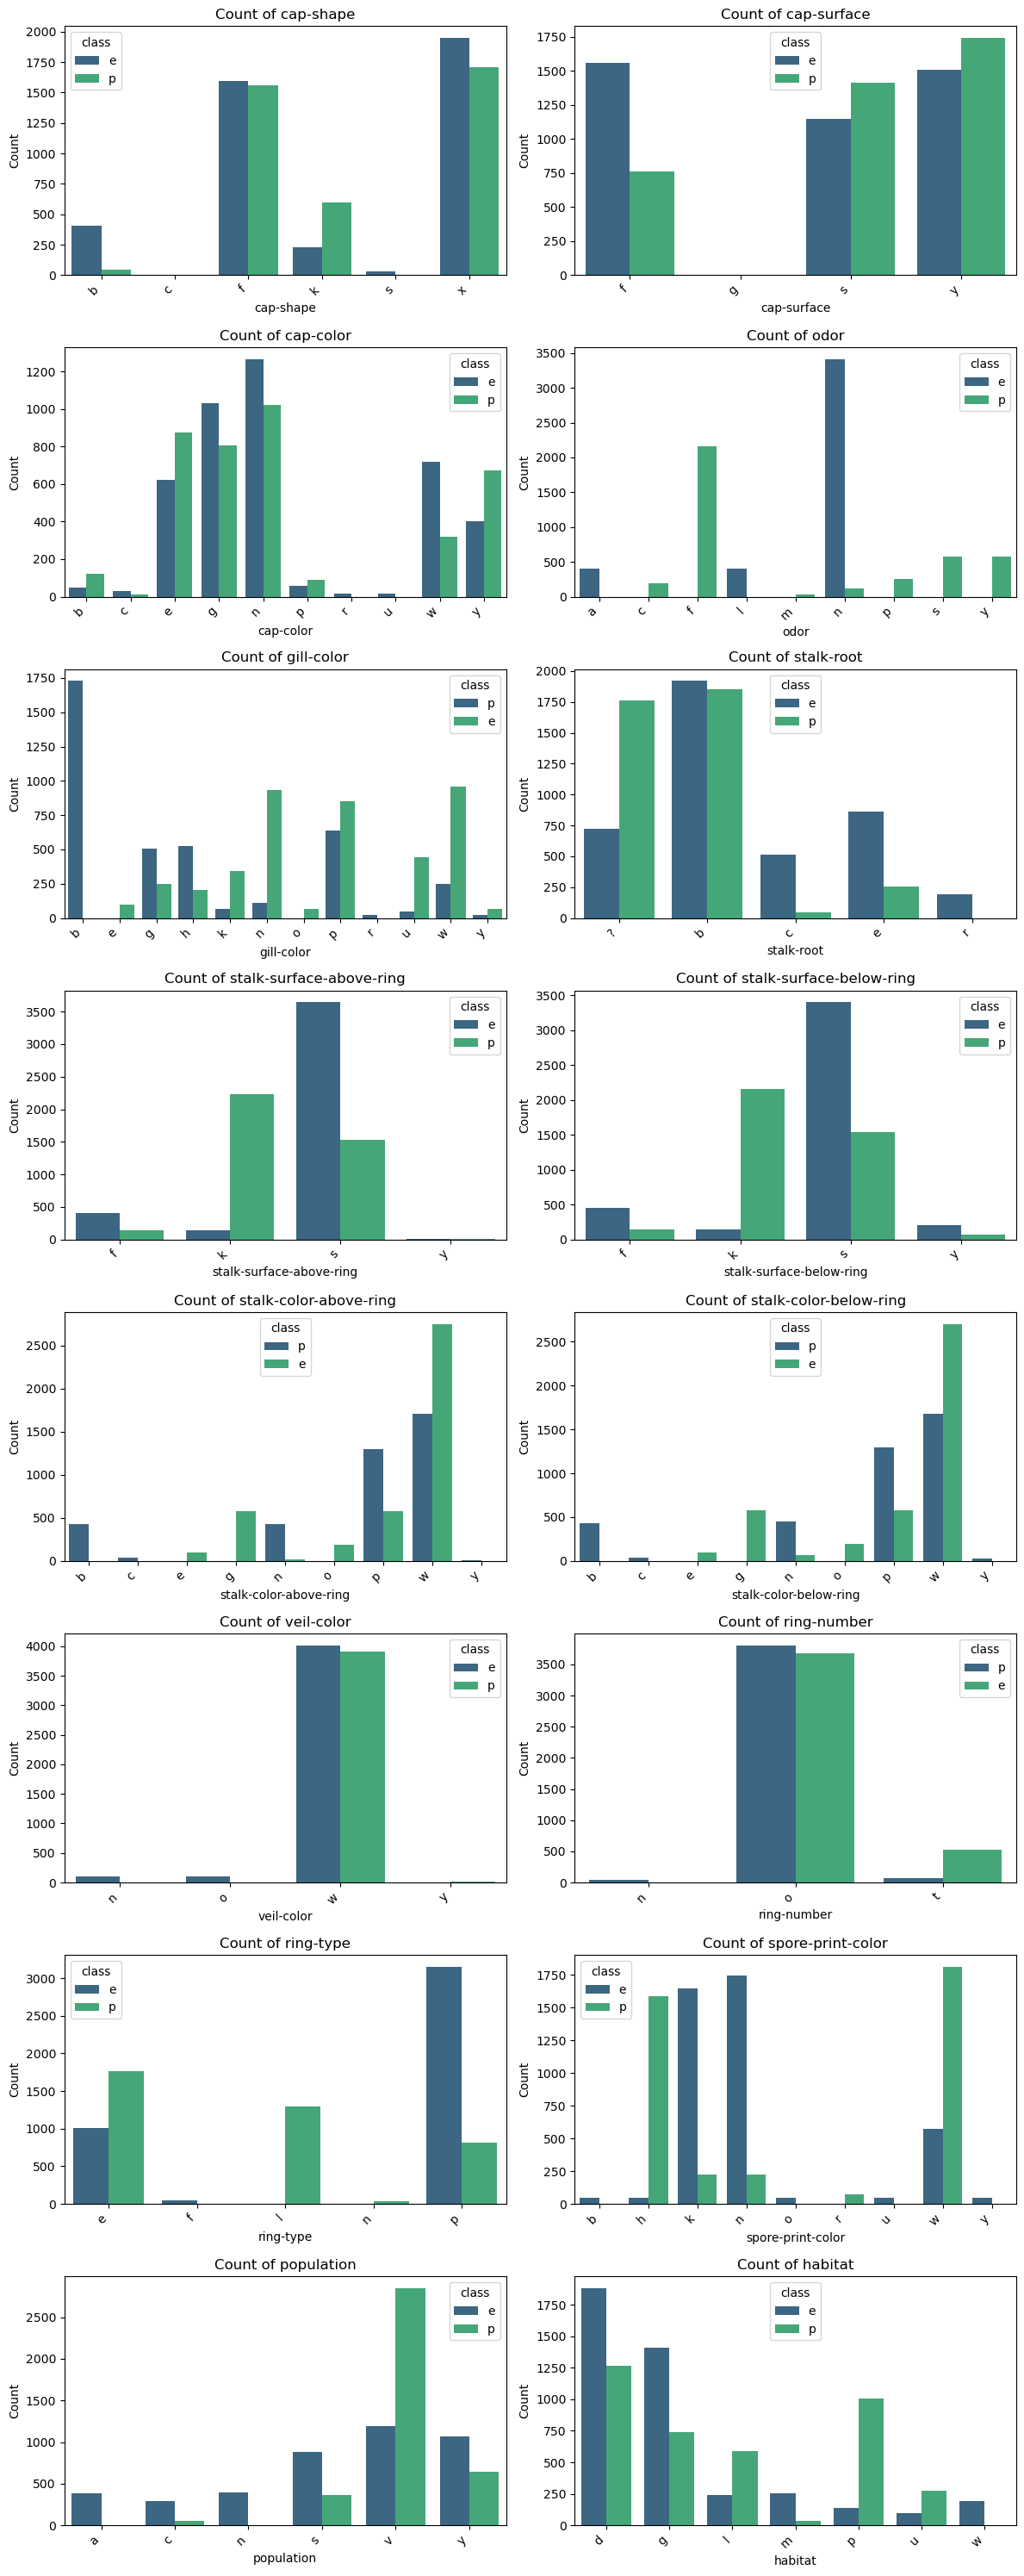

In [35]:
#Visualing the occurances of our target variables for each attribute
def plotClass(x,ax):
    group = mushroom_new.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')
cols = mushroom_new.columns.tolist()
fig, axes = plt.subplots(8, 2, figsize=(12, 6 * 5))

for index,column in enumerate(cols[1:]):
    row = index // 2 
    col = index % 2
    ax = axes[row,col]
    plotClass(column, ax)
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

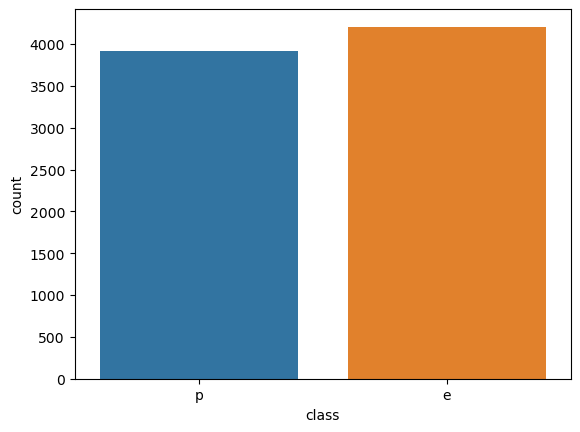

In [37]:
#To check if there is any imbalances in the target feature column
sns.countplot(data = mushroom_new, x="class")

# Model Building

#### Split data into X and Y 
#### 80% of split data is given to training data and remaining to test data

In [9]:
# Arrange data into independent variables and target variables
X=mushroom_new.drop(columns='class')
y=mushroom_new['class'] #is the target

#### Split dataset in 80:20 proportion

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [11]:
from sklearn.preprocessing import LabelEncoder
# Create an LabelEncoder object
encoder = LabelEncoder()

# Apply Label Encoding to the entire DataFrame
mushroom_encoded = mushroom_new.apply(lambda col: encoder.fit_transform(col))

# Display the encoded DataFrame
print(mushroom_encoded)

      class  cap-shape  cap-surface  cap-color  odor  gill-color  stalk-root  \
0         1          5            2          4     6           4           3   
1         0          5            2          9     0           4           2   
2         0          0            2          8     3           5           2   
3         1          5            3          8     6           5           3   
4         0          5            2          3     5           4           3   
...     ...        ...          ...        ...   ...         ...         ...   
8119      0          3            2          4     5          11           0   
8120      0          5            2          4     5          11           0   
8121      0          2            2          4     5           5           0   
8122      1          3            3          4     8           0           0   
8123      0          5            2          4     5          11           0   

      stalk-surface-above-ring  stalk-s

In [38]:
# Arrange data into independent variables and target variables
X = mushroom_encoded.loc[: , ['cap-shape','stalk-surface-above-ring', 'habitat', 'spore-print-color']]
y=mushroom_encoded['class'] #is the target

Above, we select few features that have less correlation. This is mainly done to avoid multicollinearity.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# Classification model 1 : Logistic Regression 

In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# fitting the model on training
log_r = LogisticRegression(solver="liblinear")
log_r.fit(X_train, y_train)
#predict on test
y_predict = log_r.predict(X_test)

In [42]:
accuracy = log_r.score(X_test, y_test)
print(accuracy)

0.7231337161607875


In [44]:
from sklearn import metrics
Accuracy_LR=metrics.accuracy_score(y_test,y_predict)
print('accuracy:%.2f\n\n'%(Accuracy_LR))
LR_CM=metrics.confusion_matrix(y_test,y_predict)
print('Confusion Matrix:')
print(LR_CM,'\n\n')
print('--------------------------------')
result=metrics.classification_report(y_test,y_predict)
print('Classification Report:\n')
print(result)

accuracy:0.72


Confusion Matrix:
[[988 288]
 [387 775]] 


--------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1276
           1       0.73      0.67      0.70      1162

    accuracy                           0.72      2438
   macro avg       0.72      0.72      0.72      2438
weighted avg       0.72      0.72      0.72      2438



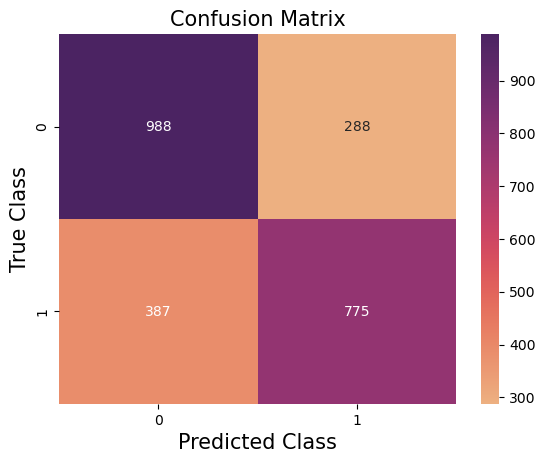

In [45]:
ConfusionMatrix = sns.heatmap(LR_CM, cmap= 'flare',annot=True, fmt='d')
 
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# Classification Model 2 : K Nearest Neighbour

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean', p =2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [56]:
#Evaluating the model
y_pred = classifier.predict(X_test)

C:\Users\vysha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
from sklearn import metrics
Accuracy_KNN=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(Accuracy_KNN))
KNN_CM=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(KNN_CM,'\n\n')
print('--------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.93


Confusion Matrix:
[[1249   27]
 [ 141 1021]] 


--------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1276
           1       0.97      0.88      0.92      1162

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



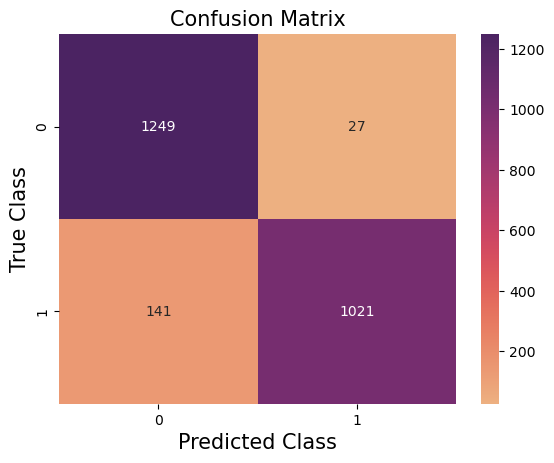

In [58]:
ConfusionMatrix = sns.heatmap(KNN_CM, cmap= 'flare',annot=True, fmt='d')
 
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

# Classification Model 3 : Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn import metrics
Accuracy_DT=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(Accuracy_DT))
KNN_DT=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(KNN_DT,'\n\n')
print('--------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.94


Confusion Matrix:
[[1243   33]
 [ 106 1056]] 


--------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1276
           1       0.97      0.91      0.94      1162

    accuracy                           0.94      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



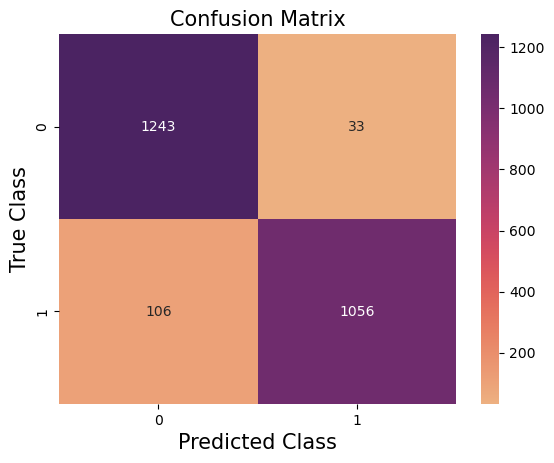

In [63]:
ConfusionMatrix = sns.heatmap(KNN_DT, cmap= 'flare',annot=True, fmt='d')
 
plt.xlabel("Predicted Class",fontsize=15)
plt.ylabel("True Class",fontsize=15)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

# Comparing the results

In [64]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Decision Tree'
    ],
    'Accuracy': [
        Accuracy_LR,Accuracy_KNN,Accuracy_DT
    ]
})

In [65]:
models.sort_values(by=['Accuracy'], ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Accuracy
2,Decision Tree,0.942986
1,K Nearest Neighbors,0.931091
0,Logistic Regression,0.723134
